# Taller Final Seminario de Programación 

- Jennyfer Sirley Ortiz Herrera
- Juan Diego Dussán Zuluaga
- Ana Maria Vega Rueda

## Tabla de contenido

- [Análisis Exploratorio de los datos](#análisis-exploratorio-de-los-datos)
- [Exploración Previa - Solo cuantitativa](#exploracion-previa---solo-cuantitativa)
- [Exploración Total](#exploración-total)
- [Aprendizaje Supervisado](#aprendizaje-supervisado)

## Análisis Exploratorio de los datos

### Base de datos

En este informe se realiza la exploración de un conjunto de datos que proporciona información sobre la estimación de los niveles de obesidad en individuos de México, Perú y Colombia, basada en sus hábitos alimenticios y condición física. Esta se compone de 17 características y 2111 registros, todos ellos etiquetados con la variable NObesity (Nivel de Obesidad). Esta variable permite clasificar los datos en categorías como Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III. Aproximadamente el 77% de los datos fueron generados sintéticamente utilizando la herramienta Weka y el filtro SMOTE, mientras que el 23% restante se obtuvo directamente de los usuarios a través de una plataforma web.

Caracteristicas de la base de datos:

- Gender (Género)
- Age (Edad)
- Height (Altura)
- Weight (Peso)
- family_history_with_overweight (Antecedentes familiares de sobrepeso)
- FAVC (Consumo de alimentos de alto valor calórico)
- FCVC (Consumo de alimentos de bajo valor calórico)
- NCP (Número de comidas principales diarias)
- CAEC (Consumo de comida entre comidas)
- SMOKE (Hábito de fumar)
- CH2O (Consumo de agua diario)
- SCC (Calorías consumidas en alimentos de comida chatarra)
- FAF (Actividad física semanal)
- TUE (Tiempo de uso de dispositivos electrónicos diariamente)
- CALC (Consumo de alcohol)
- MTRANS (Medio de transporte)
- NObeyesdad (Clase de nivel de obesidad)

In [107]:
# Librerias Necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import numpy as np
import gower as gw
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import os
from prince import MCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier


In [10]:
#obesidad=pd.read_csv('C:/Users/anama/Downloads/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/ObesityDataSet_raw_and_data_sinthetic.csv')
#os.getcwd()
obesidad = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
obesidad.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


El siguiente gráfico muestra la relación entre las columnas 'Weight' (Peso) y 'Height' (Altura):

<Axes: xlabel='Weight', ylabel='Height'>

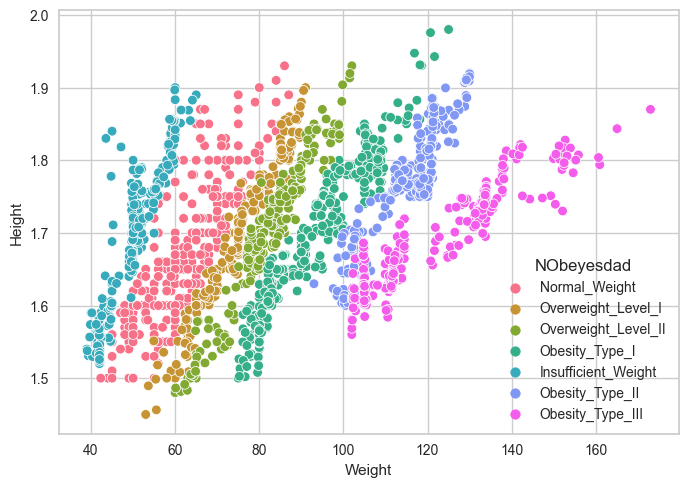

In [11]:
sns.scatterplot(data=obesidad,x='Weight',y='Height',hue='NObeyesdad')

Se extraen esas columnas de la base:


In [12]:
obesidad = obesidad.drop(['Weight', 'Height'], axis=1)
obesidad.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Debido a que la altura y el peso son variables críticas en el análisis del nivel de obesidad, como se observó en el diagrama de dispersion anterior; estas no deberían ser eliminadas. Lo anterior debido a que son variables importantes para comprender y evaluar la obesidad en un estudio. Ambas variables son esenciales en la evaluación del índice de masa corporal (IMC) y son indicadores clave en la determinación del estado de peso de un individuo. La omisión de estas variables puede conducir a una interpretación incompleta de los resultados y podría reducir la validez y relevancia de análisis que se realice.

### Ajuste de la base de datos

In [13]:
# Información general de la base de datos
obesidad.info()
# Datos nulos
obesidad.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   FAVC                            2111 non-null   object 
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   object 
 7   SMOKE                           2111 non-null   object 
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   object 
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Antes de comenzar con el análisis de esta base, es necesario ajustar las variables categoricas:

- FCVC
- NCP
- CH2O
- FAF
- TUE

Esta corrección de la base de datos se llevó a cabo siguiendo los lineamientos establecidos en el artículo 'Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru, and Mexico'. Durante el proceso de revisión, se identificó que ciertas variables categóricas originalmente se encontraban representadas como valores flotantes. En consonancia con las respuestas proporcionadas en el mencionado documento, se procedió a realizar la corrección pertinente, asignando a cada variable sus respectivos valores categóricos correspondientes.

Es importante destacar que, como resultado de este proceso de corrección, se observó que al realizar este cambio, la variable 'NCP' presentaba un total de 69 observaciones nulas. Dado que la integridad y la consistencia de los datos son fundamentales para la calidad del análisis, se tomó la decisión de eliminar estas observaciones nulas para garantizar la confiabilidad de los resultados derivados del estudio.

In [14]:
# FCVC
# Definir un diccionario para mapear los valores
label_map = {1: 'Never', 2: 'Sometimes', 3: 'Always'}

# Convertir la columna 'FCVC' a entero
obesidad['FCVC'] = obesidad['FCVC'].astype(int)

# Ajustar
obesidad['FCVC'] = obesidad['FCVC'].map(label_map)

In [15]:
# NCP
# Definir un diccionario para mapear los valores
label_map = {1: 'Between 1 y 2', 2: 'Three', 3: 'More than three'}

# Convertir la columna 'NCP' a entero
obesidad['NCP'] = obesidad['NCP'].astype(int)

# Ajustar
obesidad['NCP'] = obesidad['NCP'].map(label_map)


In [16]:
# CH2O
# Definir un diccionario para mapear los valores
label_map = {1: 'Less than a liter', 2: 'Between 1 and 2 L', 3: 'More than 2 L'}

# Convertir la columna 'CH2O' a entero
obesidad['CH2O'] = obesidad['CH2O'].astype(int)

# Ajustar
obesidad['CH2O'] = obesidad['CH2O'].map(label_map)

In [17]:
# FAF
# Definir un diccionario para mapear los valores
label_map = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}

# Convertir la columna 'CH2O' a entero
obesidad['FAF'] = obesidad['FAF'].astype(int)

# Ajustar
obesidad['FAF'] = obesidad['FAF'].map(label_map)

In [18]:
# TUE
# Definir un diccionario para mapear los valores
label_map = {0: '0-2 hours', 1: '3-5 hours', 2: 'More than 5 hours'}

# Convertir la columna 'CH2O' a entero
obesidad['TUE'] = obesidad['TUE'].astype(int)

# Ajustar
obesidad['TUE'] = obesidad['TUE'].map(label_map)

In [19]:
obesidad['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Eliminacion de datos nulos:

In [20]:
obesidad = obesidad.dropna(axis=0)
obesidad.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2 L,no,I do not have,3-5 hours,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,Always,More than three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0-2 hours,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,Always,More than three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0-2 hours,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,Sometimes,Between 1 y 2,Sometimes,no,Between 1 and 2 L,no,I do not have,0-2 hours,Sometimes,Public_Transportation,Overweight_Level_II


### Análisis descriptivo

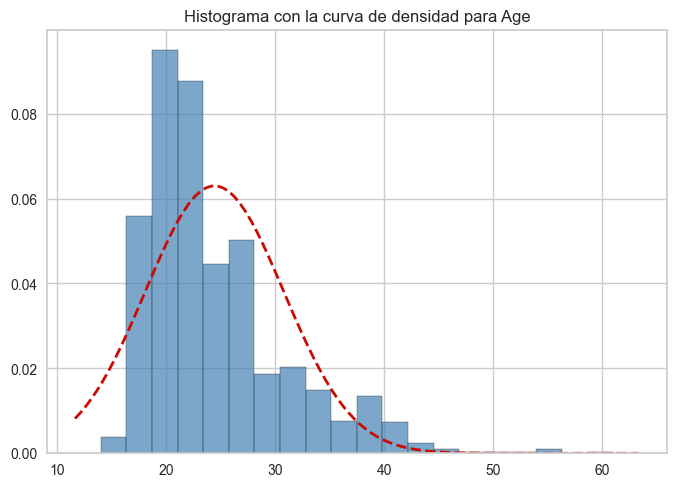

In [21]:
# Histograma para la edad
plt.hist(obesidad['Age'], bins=20, alpha=0.7, density=True, color='steelblue', edgecolor='black')

# Ajustar la distribución normal
mu, std = stats.norm.fit(obesidad['Age'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r--', linewidth=2)

plt.title('Histograma con la curva de densidad para Age')
plt.grid(True)
plt.show()


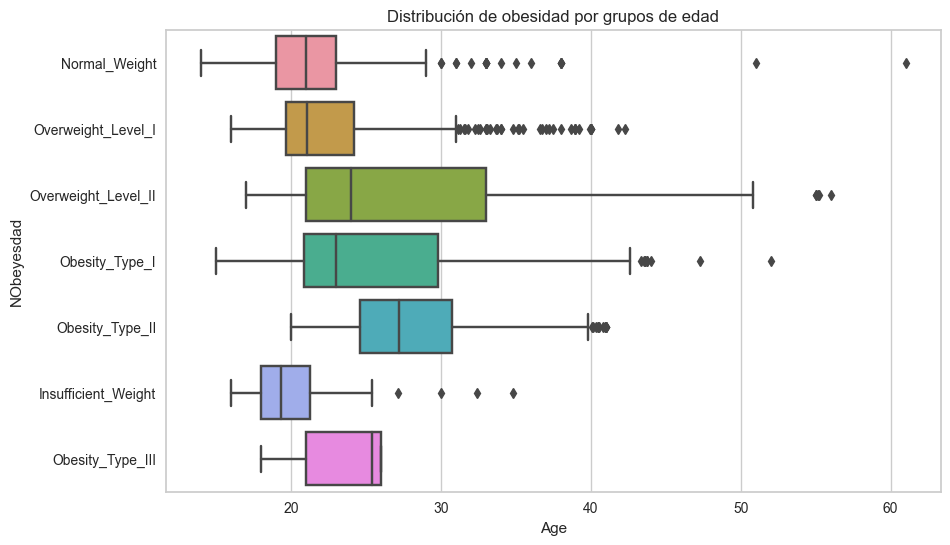

In [22]:
# Comparación de grupos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='NObeyesdad', data=obesidad)
plt.title('Distribución de obesidad por grupos de edad')
plt.show()


## Exploración Previa - Solo cuantitativa

### Análisis de Componentes Principales

## Exploración Total

#### Analisis de correspondencia multiple - Reducción de dimensiones 


In [25]:
obesidad

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2 L,no,I do not have,3-5 hours,no,Public_Transportation,Normal_Weight
1,Female,21.000000,yes,no,Always,More than three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0-2 hours,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,no,no,Always,More than three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0-2 hours,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,no,no,Sometimes,Between 1 y 2,Sometimes,no,Between 1 and 2 L,no,I do not have,0-2 hours,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,Always,More than three,Sometimes,no,Less than a liter,no,1 or 2 days,0-2 hours,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,yes,yes,Always,More than three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0-2 hours,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,yes,yes,Always,More than three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0-2 hours,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,yes,yes,Always,More than three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0-2 hours,Sometimes,Public_Transportation,Obesity_Type_III


In [26]:
#os.getcwd()
#datos = pd.read_csv('Obesidad_corregido.csv')
datos = obesidad
datos

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2 L,no,I do not have,3-5 hours,no,Public_Transportation,Normal_Weight
1,Female,21.000000,yes,no,Always,More than three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0-2 hours,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,no,no,Always,More than three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0-2 hours,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,no,no,Sometimes,Between 1 y 2,Sometimes,no,Between 1 and 2 L,no,I do not have,0-2 hours,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,Always,More than three,Sometimes,no,Less than a liter,no,1 or 2 days,0-2 hours,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,yes,yes,Always,More than three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0-2 hours,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,yes,yes,Always,More than three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0-2 hours,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,yes,yes,Always,More than three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0-2 hours,Sometimes,Public_Transportation,Obesity_Type_III


In [30]:
# Variables categóricas
categorical_columns = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'CALC']

# Crear un DataFrame solo con las variables categóricas
categorical_data = datos[categorical_columns]

# Crear tablas de contingencia de variables categóricas en porcentaje
contingency_tables = {}

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(categorical_data[col1], categorical_data[col2], normalize='all')
            contingency_tables[f'{col1} vs {col2}'] = contingency_table

# vosualizacion de resultados
for key, table in contingency_tables.items():
    print(f"Tabla de Contingencia para {key}:\n")
    print(table)
    print("\n")

Tabla de Contingencia para FAVC vs FCVC:

FCVC    Always     Never  Sometimes
FAVC                               
no    0.041626  0.005387   0.065132
yes   0.266405  0.090597   0.530852


Tabla de Contingencia para FAVC vs NCP:

NCP   Between 1 y 2  More than three     Three
FAVC                                          
no         0.023506         0.075906  0.012733
yes        0.169931         0.591087  0.126836


Tabla de Contingencia para FAVC vs CAEC:

CAEC    Always  Frequently  Sometimes        no
FAVC                                           
no    0.002938    0.028404   0.076396  0.004407
yes   0.018119    0.075906   0.773262  0.020568


Tabla de Contingencia para FAVC vs SMOKE:

SMOKE        no       yes
FAVC                     
no     0.107738  0.004407
yes    0.872674  0.015181


Tabla de Contingencia para FAVC vs CH2O:

CH2O  Between 1 and 2 L  Less than a liter  More than 2 L
FAVC                                                     
no             0.054848           0.03

Al relaizar un analsiis con tablas de contigencia encontramos relaciones directas entre categorias de los niveles de las variables, que podrian ser un proxy para categorizar caracteristicas entre las personas observadas, la variable (FAVC)  Consumo frecuente de alimentos ricos en calorías el 60% de los que respondieron si, comen mas de tres veces al dia, ademas el 77 % comen pocos vegetales, 66% consume licor. lo permite indefir que existe una relacion hacia los amlos habitos alimenticios que representan cada una de las variables. 

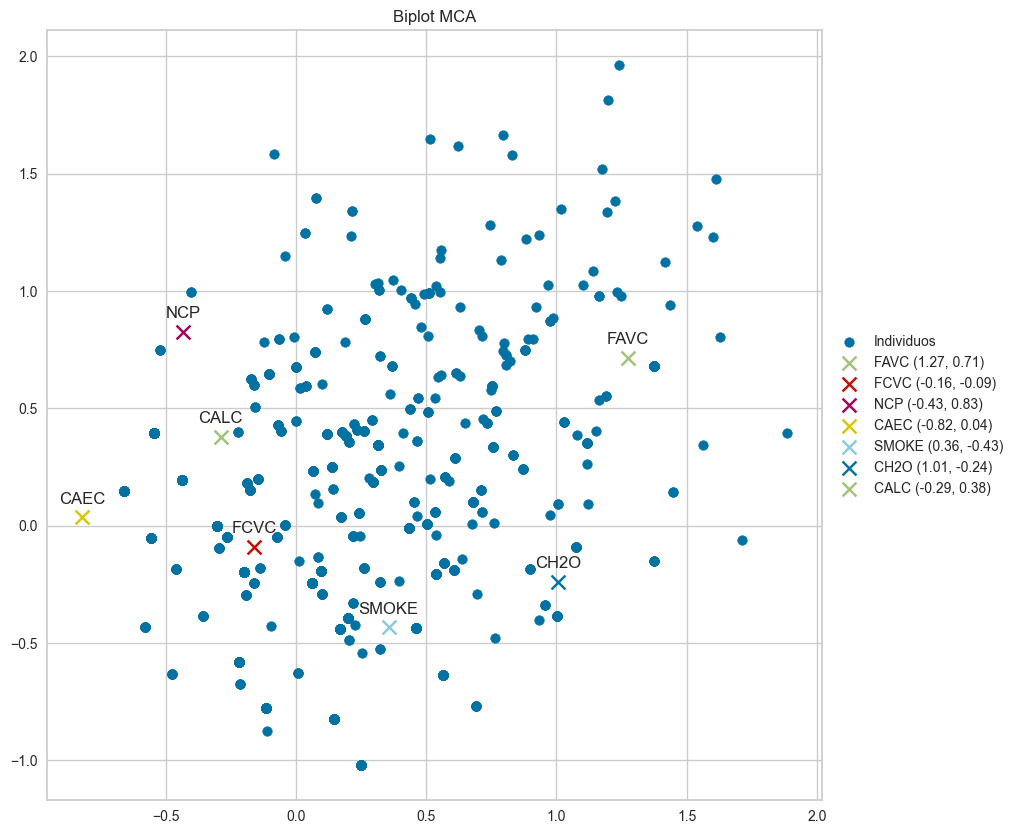

In [137]:
# Realizar el MCA
mca = MCA()
mca.fit(categorical_data)

# Obtener las coordenadas de los individuos en el espacio MCA
ind_coord = mca.row_coordinates(categorical_data)

# Obtener las coordenadas de las categorías en el espacio MCA
cat_coord = mca.column_coordinates(categorical_data)

# Crear un gráfico de biplot MCA
fig, ax = plt.subplots(figsize=(10, 10))

# Plot de las coordenadas de los individuos
plt.scatter(ind_coord.iloc[:, 0], ind_coord.iloc[:, 1], label="Individuos")

# Plot de las coordenadas de las categorías con etiquetas
for i, txt in enumerate(categorical_columns):
    x = cat_coord.iloc[i, 0]
    y = cat_coord.iloc[i, 1]
    plt.scatter(x, y, marker='x', s=100, label=f'{txt} ({x:.2f}, {y:.2f})')
    plt.annotate(f'{txt}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Título del gráfico
plt.title("Biplot MCA")

# Mostrar el gráfico
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.show()

Los individuos están representados por los puntos azules y las variables por las X . Individuos con un perfil similar están cerca en el mapa de factores y lo mismo se puede decir para los puntos de las variables. Así entonces, se puede decir que una buena parte de los individuos se relaciona con el consumo de productos altos de calorias, con el consumo de cigarrillo, con el consumo de bebidas alcoholicas, con el alto numero de comidas diarias. 

### Calidad de la representación de las categoría de las variables.

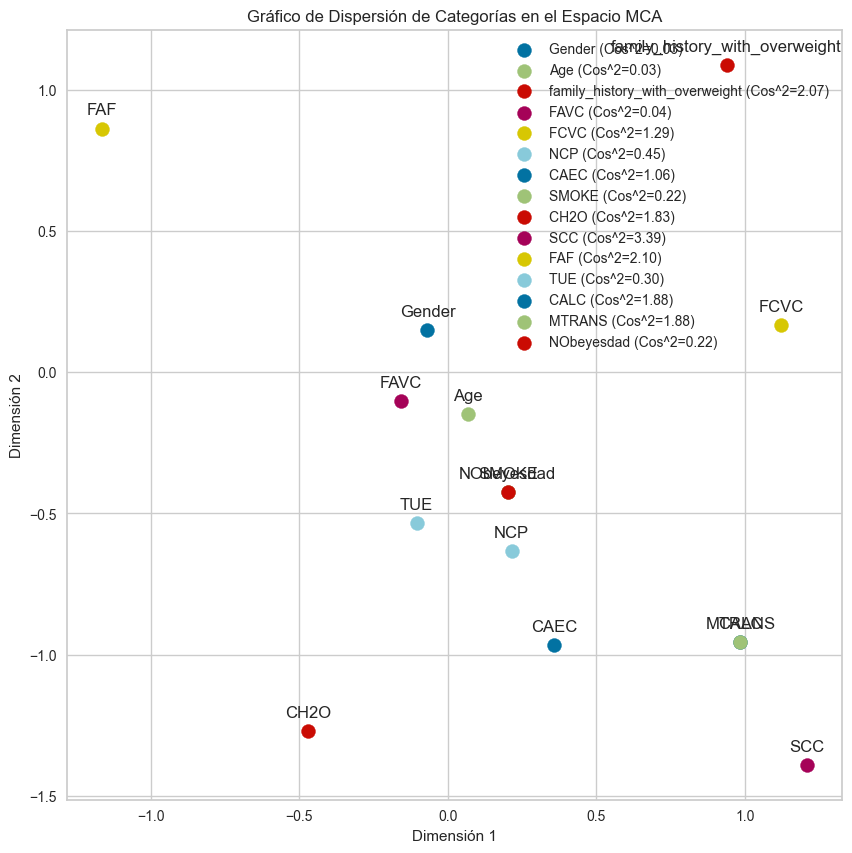

In [67]:
# Obtener las coordenadas de las categorías en el espacio MCA
cat_coord = mca.column_coordinates(datos)

# Calcular los valores de Cos^2 para las categorías
cat_cos2 = (cat_coord ** 2).sum(axis=1)

# Crear un gráfico de dispersión para las categorías con etiquetas y colores según Cos^2
plt.figure(figsize=(10, 10))

for i, txt in enumerate(datos.columns):
    x = cat_coord.iloc[i, 0]
    y = cat_coord.iloc[i, 1]
    cos2 = cat_cos2.iloc[i]
    plt.scatter(x, y, label=f'{txt} (Cos^2={cos2:.2f})', s=100)
    plt.annotate(f'{txt}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Gráfico de Dispersión de Categorías en el Espacio MCA')
plt.legend(loc='upper right')
plt.show()

La calidad de la representación se llama el coseno cuadrado (Cos2), el cual mide el grado de asociación entre las categorías de las variables y un eje en particular. Si la categoría de una variable está bien representada por dos dimensiones, la suma del cos2 es cercana a uno. Para algunos ítems de las filas, más de dos dimensiones son requeridas para represetar perfectamente los datos, por ejemplo la variable FCVC ( Frecuencia de consumo de vegetales), Consumo de alimentos entre comidas (CAEC), Consumo de alcohol (CALC), Monitoreo del consumo de calorías (SCC) entre otra, solamente la variable Número de comidas principales (NCP), SMOKE, NObesidad, Requieren mas de una dimension

In [ ]:
ind_coord.columns = ['Dim1', 'Dim2']
ind_coord['NObeyesdad'] = datos['NObeyesdad'] 
ind_coord

## Arbol de decision con Dimensiones principales



In [140]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X = ind_coord[['Dim1', 'Dim2']]  # Features
y = ind_coord['NObeyesdad']  # Variable objetivo

# Utiliza train_test_split para dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el modelo en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.511002444987775


el modelo tiene una precision del 51%

### Modelos de agrupación


In [115]:
#Cargue de datos
datos_obesidad = obesidad
datos_obesidad.head()

columnas=['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
datos_obesidad[columnas]


,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2 L,no,I do not have,3-5 hours,no,Public_Transportation
1,Female,21.000000,yes,no,Always,More than three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0-2 hours,Sometimes,Public_Transportation
2,Male,23.000000,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Frequently,Public_Transportation
3,Male,27.000000,no,no,Always,More than three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0-2 hours,Frequently,Walking
4,Male,22.000000,no,no,Sometimes,Between 1 y 2,Sometimes,no,Between 1 and 2 L,no,I do not have,0-2 hours,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,Always,More than three,Sometimes,no,Less than a liter,no,1 or 2 days,0-2 hours,Sometimes,Public_Transportation
2107,Female,21.982942,yes,yes,Always,More than three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0-2 hours,Sometimes,Public_Transportation
2108,Female,22.524036,yes,yes,Always,More than three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0-2 hours,Sometimes,Public_Transportation
2109,Female,24.361936,yes,yes,Always,More than three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0-2 hours,Sometimes,Public_Transportation


## Distancia de Gower

In [116]:
distance_matrix=gw.gower_matrix(datos_obesidad[columnas])
distance_matrix

array([[0.        , 0.5       , 0.21732523, ..., 0.359459  , 0.36225218,
        0.36119255],
       [0.5       , 0.        , 0.5744681 , ..., 0.359459  , 0.36225218,
        0.36119255],
       [0.21732523, 0.5744681 , 0.        , ..., 0.42929476, 0.43064123,
        0.4295816 ],
       ...,
       [0.359459  , 0.359459  , 0.42929476, ..., 0.        , 0.00279316,
        0.00173355],
       [0.36225218, 0.36225218, 0.43064123, ..., 0.00279316, 0.        ,
        0.00105962],
       [0.36119255, 0.36119255, 0.4295816 , ..., 0.00173355, 0.00105962,
        0.        ]], dtype=float32)

In [89]:
distance_matrix.ndim

2

Aglomerative Clustering
Para la agrupación de individuos se utiliza el un modelo de "Aglomerative Clustering". Se utilizan dos grupos para la agrupación de las personas, debido a la necesidad de clasificar las personas en situación de obsedidad o no.

In [92]:
clustering = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete') 
clustering.fit(distance_matrix)
datos_obesidad['Cluster'] = clustering.labels_

c:\Users\Jennyfer Ortiz\Desktop\MINE\Semestre_2\SEMINARIO_DE_PROGRAMACION\PROYECTO_MINE\.conda\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


#### Porcentaje de clasificación

<Axes: ylabel='count'>

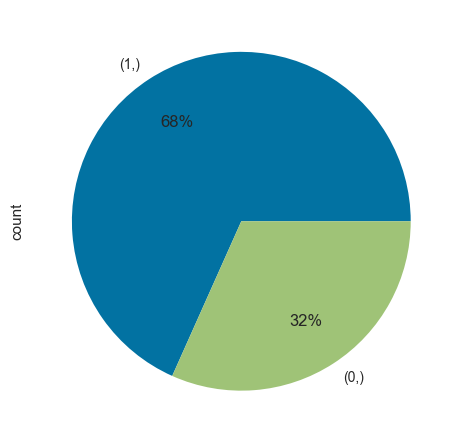

In [93]:
datos_obesidad[['Cluster']].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [94]:
#Porcentaje de datos clasificados como obesos
datos_obesidad["Cluster"].value_counts()/datos_obesidad["Cluster"].count()*100

Cluster
1    68.315377
0    31.684623
Name: count, dtype: float64

## Matriz de confusión.

In [95]:
datos_obesidad["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II', 'Insufficient_Weight',
       'Obesity_Type_III'], dtype=object)

In [96]:
def transform_label(label):
    if label.startswith('Overweight') or label.startswith('Obesity'):
        return 1
    else:
        return 0

In [97]:
datos_obesidad["Obesidad"] = datos_obesidad['NObeyesdad'].apply(transform_label)

In [98]:
datos_obesidad["Obesidad"].unique()

array([0, 1], dtype=int64)

Text(0.5, 31.222222222222214, 'Predicted Labels')

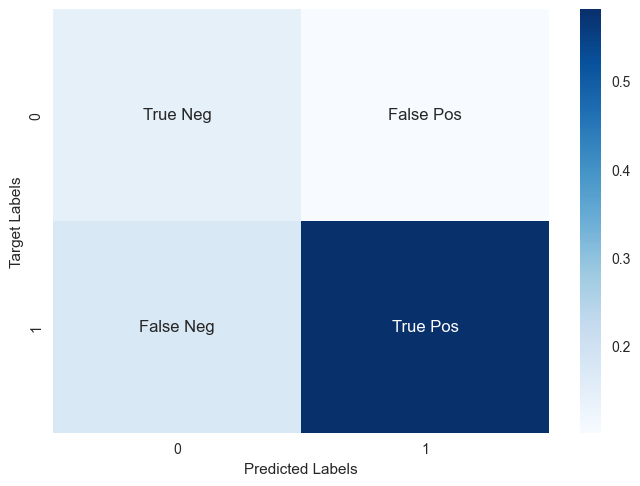

In [99]:
cf_matrix = confusion_matrix(datos_obesidad["Obesidad"],datos_obesidad["Cluster"])
cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_labels = np.asarray(cf_labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=cf_labels, fmt='', cmap='Blues')
ax.set_ylabel('Target Labels')    
ax.set_xlabel('Predicted Labels')

#### Medidas de calidad.

In [100]:
True_neg = cf_matrix[0,0]
False_pos = cf_matrix[0,1]
True_pos = cf_matrix[1,1]
False_neg = cf_matrix[1,0]

accuracy = (True_neg + True_pos)/(True_neg + False_neg + True_pos + False_pos)
recall = (True_pos)/(False_neg+True_pos)
precision = (True_pos)/(False_pos + True_pos)
F1_score = 2 * ((precision*recall)/(precision+recall))

In [101]:
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1_score: {F1_score}')

Accuracy: 0.7247796278158668
Recall: 0.7702790395846852
Precision: 0.8508960573476703
F1_score: 0.8085831062670299


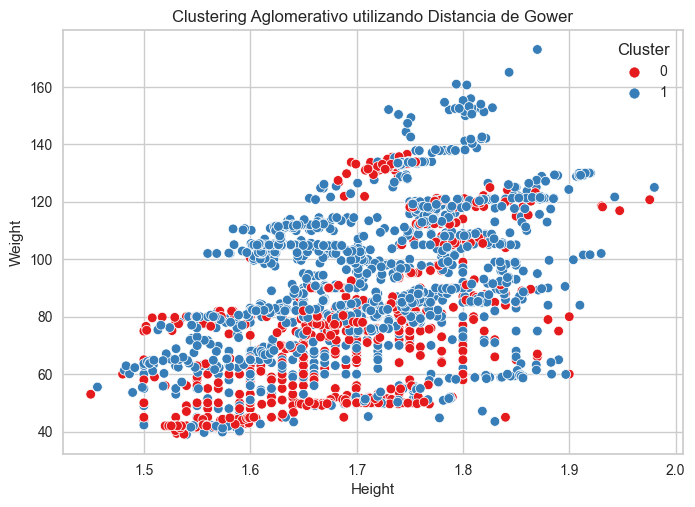

In [102]:
sns.scatterplot(x='Height', y='Weight', data=datos_obesidad, hue='Cluster', palette='Set1')
plt.title('Clustering Aglomerativo utilizando Distancia de Gower')
plt.show()

Se tiene entonces, unas agrupaciones para determinar si el conjunto de variables es determinante para ser clasificado como persona con obesidad. Se encuentra por tanto, que el 68.3% de los individuos fue clasificado como obeso, mientras que el 31.7% es clasificado como no.
Al observar la matriz de confusión se muestra como los errores de tipo 1 y 2 no son realmente frecuentes, mientras que los casos positivos representan un buen resultado.

Además, en términos de medida de calidad se obtuvo un accuracy de .72, recall de .77, precision de .85 y un f1 de .8. Indicando un buen desempeño del modelo, a su vez puede señalar que un abordaje de la clasificación de los individuos a través de las dos categorías creadas puede resultar con mejor resultado a las divisiones iniciales de la variable.

## Aprendizaje Supervisado

### Regresión Logística

In [103]:
label_encoder = LabelEncoder()
for column in datos_obesidad.columns:
    if datos_obesidad[column].dtype == type(object):
        datos_obesidad[column] = label_encoder.fit_transform(datos_obesidad[column])

In [104]:
datos_obesidad = datos_obesidad.drop(["Cluster", "Obesidad"],axis = 1)

### Partición de la base

In [105]:
X = datos_obesidad.drop("NObeyesdad", axis=1)

y = datos_obesidad["NObeyesdad"]

# Partición de la base en 2 (Entrenamiento y testeo) (80/20) de nuevo con semilla fija.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
logisticRegr = LogisticRegression()

In [109]:
logisticRegr.fit(X_train, y_train)

c:\Users\Jennyfer Ortiz\Desktop\MINE\Semestre_2\SEMINARIO_DE_PROGRAMACION\PROYECTO_MINE\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
predictions = logisticRegr.predict(X_test)

In [111]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        47
           1       0.57      0.38      0.45        53
           2       0.48      0.50      0.49        66
           3       0.63      0.69      0.66        58
           4       0.83      1.00      0.91        68
           5       0.54      0.35      0.42        55
           6       0.45      0.48      0.47        62

    accuracy                           0.61       409
   macro avg       0.60      0.60      0.59       409
weighted avg       0.60      0.61      0.59       409



Considerando el puntaje f1 debido a que combina la precisión y el recall en un solo número, siendo esta una medida de la precisión general del modelo. Donde los valores oscilan entre 0 y 1, donde 1 es la mejor puntuación posible.

Por tanto, se puede hablar que para las categorías 0, 3 y 4 se tiiene un resultado aceptable. Las demas se encuentran en un resultado intermedio con valores superios a .4 .

Por otra parte, al observar las predicciones positivas correctas (precision) se tiene que la mayoría de categorías fueron identificadas adecuadamente, excepto 2 y 6 con resultados entre .45 y .5.

Respecto al recall, los verdaderos positivos tienen un valore por encima de .5, con el grupo 1 y 5 con valores bajos.

El accuracy es la precisión general del modelo en predecir correctamente todas las clases. Como resultado el modelo utilizado posee un 0.61

### Matriz de consistencia

In [113]:
cf_matrix

array([[ 293,  208],
       [ 354, 1187]], dtype=int64)

Text(0.5, 31.222222222222214, 'Predicted Labels')

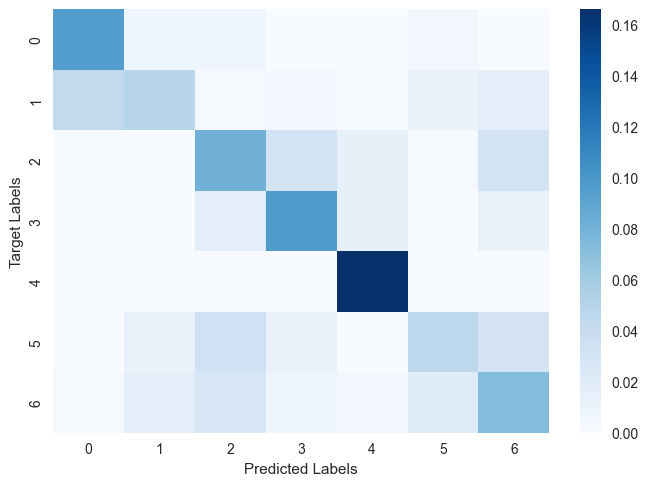

In [114]:
cf_matrix = confusion_matrix(y_test,predictions)
cf_labels = np.asarray(cf_labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), fmt='', cmap='Blues')
ax.set_ylabel('Target Labels')    
ax.set_xlabel('Predicted Labels')

En esta matriz se muestra, como la mayoría de los resultados obtenidos por el modelo tuvieron un buen desempeño. Se tienen casos como el del primer con segundo grupo (0 y 1) que poseen un nivel de clasificación erronéa, al clasificar como 0 indivduos que pertenecen a la categoría 1.
Dado que la mayoría de los resultados se encuentran en la diagonal se tiene un modelo aceptable en terminos de clasificación. Resultado concorde con las medidas de calidad expuestas anteriormente.

### Random Forest

In [157]:
# Preprocesamiento de datos
label_encoder = LabelEncoder()
for column in obesidad.columns:
    if obesidad[column].dtype == type(object):
        obesidad[column] = label_encoder.fit_transform(obesidad[column])
print(obesidad)

      Gender        Age  family_history_with_overweight  FAVC  FCVC  NCP  \
0          0  21.000000                               1     0     2    1   
1          0  21.000000                               1     0     0    1   
2          1  23.000000                               1     0     2    1   
3          1  27.000000                               0     0     0    1   
4          1  22.000000                               0     0     2    0   
...      ...        ...                             ...   ...   ...  ...   
2106       0  20.976842                               1     1     0    1   
2107       0  21.982942                               1     1     0    1   
2108       0  22.524036                               1     1     0    1   
2109       0  24.361936                               1     1     0    1   
2110       0  23.664709                               1     1     0    1   

      CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0        2      0   

Accuracy: 0.784841075794621

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        47
           1       0.65      0.58      0.61        53
           2       0.67      0.82      0.73        66
           3       0.86      0.86      0.86        58
           4       0.97      0.97      0.97        68
           5       0.76      0.64      0.69        55
           6       0.75      0.68      0.71        62

    accuracy                           0.78       409
   macro avg       0.78      0.78      0.78       409
weighted avg       0.79      0.78      0.78       409


Confusion Matrix:
 [[43  2  0  0  0  1  1]
 [ 6 31  7  1  0  3  5]
 [ 1  3 54  2  1  2  3]
 [ 0  0  5 50  0  0  3]
 [ 0  0  1  0 66  0  1]
 [ 2  6  9  1  1 35  1]
 [ 0  6  5  4  0  5 42]]


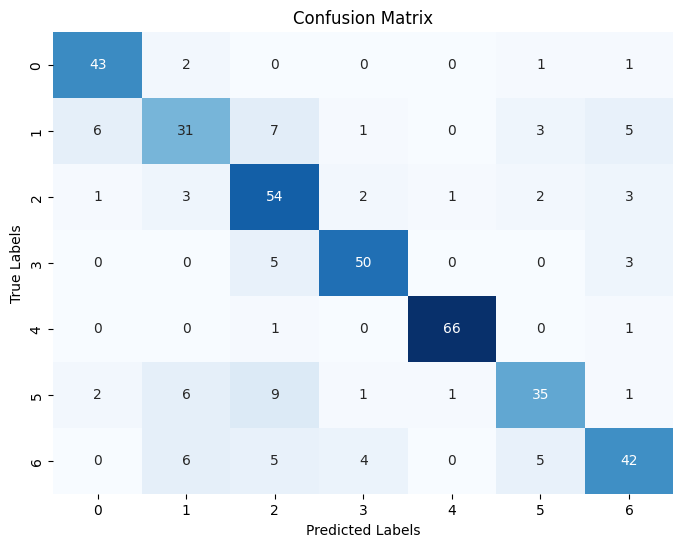

In [149]:
# Definir variables dependientes e independientes
X = obesidad.drop('NObeyesdad', axis=1)
y = obesidad['NObeyesdad']

# Partición de la base en 2 (Entrenamiento y testeo) (80/20) de nuevo con semilla fija.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred = rf_model.predict(X_test)

#Matriz de confusión
cm=confusion_matrix(y_test, y_pred)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", cm)

# Visualizar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


El modelo de Random Forest proporciona una precisión general de aproximadamente 78.48%, lo que indica que el modelo es capaz de predecir correctamente el nivel de obesidad en una proporción significativa de casos.

El informe de clasificación muestra la precisión, recuperación y puntuación F1 para cada nivel de obesidad. La precisión es más alta en los niveles 0, 3 y 4, lo que significa que el modelo tiene una mayor proporción de verdaderos positivos en estos niveles. Sin embargo, la precisión es más baja en los niveles 1, 2 y 6.

El análisis de la matriz de confusión también respalda esta observación, mostrando cómo el modelo predice las clases para cada nivel de obesidad. Los valores de la matriz de confusión indican que, en general, el modelo tiene un desempeño sólido en la predicción de los niveles 0, 3 y 4, pero es menos preciso en los niveles 1, 2 y 6.

Estos resultados sugieren que el modelo puede beneficiarse de una mayor atención a las clases minoritarias y un ajuste adicional para mejorar su capacidad predictiva en esos niveles de obesidad específicos.

### Clasificador Naive Bayes

Matriz de confusión:
[[33  4  4  2  0  2  2]
 [16 24  1  1  0  6  5]
 [ 4  0 41 14  1  2  4]
 [ 0  4  4 45  0  1  4]
 [ 0  1  0  0 67  0  0]
 [ 2  6 15  3  0 24  5]
 [ 2 11 14 14  0  4 17]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.58      0.70      0.63        47
           1       0.48      0.45      0.47        53
           2       0.52      0.62      0.57        66
           3       0.57      0.78      0.66        58
           4       0.99      0.99      0.99        68
           5       0.62      0.44      0.51        55
           6       0.46      0.27      0.34        62

    accuracy                           0.61       409
   macro avg       0.60      0.61      0.59       409
weighted avg       0.61      0.61      0.60       409

Accuracy: 0.6136919315403423


c:\Users\anama\OneDrive\Escritorio\PROYECTO1\.conda\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but CategoricalNB was fitted with feature names



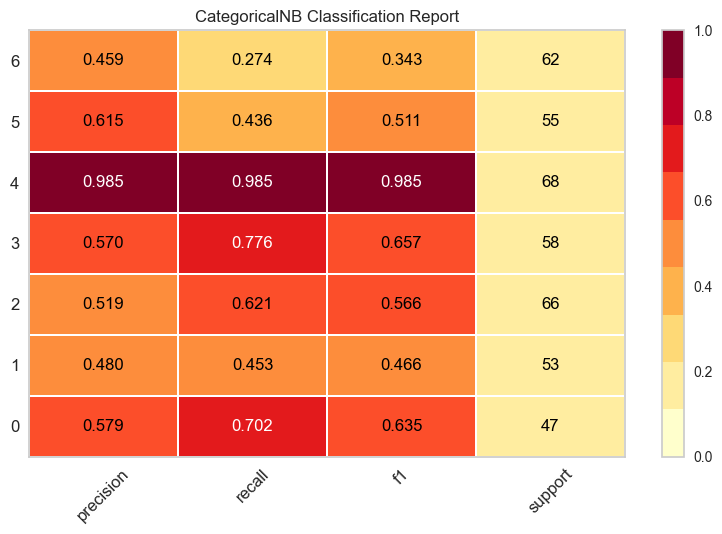

<Axes: title={'center': 'CategoricalNB Classification Report'}>

In [156]:
# Crear y ajustar el clasificador Naive Bayes
nb_classifier = CategoricalNB()
nb_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = nb_classifier.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el reporte de clasificación
cls_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print("Matriz de confusión:")
print(conf_matrix)

print("\nReporte de clasificación:")
print(cls_report)

# Calcular la exactitud del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualizar un informe de clasificación
visualizer = ClassificationReport(nb_classifier, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


En términos generales, el modelo de clasificación Naive Bayes obtiene una precisión media del 61%. Las clases 0, 3 y 4 tienen una precisión relativamente alta, mientras que las clases 1, 5 y 6 muestran valores más bajos en términos de precisión. La clase 4 tiene un rendimiento excepcionalmente alto, con una puntuación f1 casi perfecta.



### Conclusiones 

se puede decir que una buena parte de los individuos se relaciona con el consumo de productos altos de calorias, con el consumo de cigarrillo, con el consumo de bebidas alcoholicas, con el alto numero de comidas diarias. en terminos generales, los 4 modelos relaizados tiene una precision acorde, lo que permite inferir que las variables de comportamientos alimenticios y condicion fisica, son un determinante para medir el grado de obesidad en los individuos 

las variables con mayor relevanca en los modelos fueron Consumo frecuente de alimentos ricos en caloría, Frecuencia de consumo de vegetales y Consumo de alcohol

Con los resultados obtenidos se puede concluir que el modelo de clasificación de Naive Bayes tiene un desempeño moderado en la predicción de los diferentes niveles de obesidad, aunque se pueden identificar ciertas limitaciones en la precisión de la predicción para algunas clases. Para mejorar el rendimiento del modelo, podrían ser necesarias técnicas adicionales de preprocesamiento de datos, ajuste de parámetros del modelo o consideración de otros algoritmos de aprendizaje automático más complejos.

El modelo de Random Forest proporciona una precisión general de aproximadamente 78.48%, lo que indica que el modelo es capaz de predecir correctamente el nivel de obesidad en una proporción significativa de casos.
